In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# <span style="color:red; font-style:italic; text-decoration:underline;"> Partie I : Implémenter un réseau LSTM pour l'analyse de sentiment à l'aide d'un ensemble de données au format CSV. </span>

In [18]:
dataset = pd.read_csv('data/IMDB Dataset.csv') 
dataset 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 1) Chargement et Exploration du Jeu de Données </span>

>> ###  <span style="color:brown ; font-style:italic; text-decoration:underline;"> a) - Data Cleaning </span>

In [17]:
l =  list(dataset.review)
for i in range(len(l)) :
    x = l[i].replace('<br />','')
    l[i]= x.replace('<br />','')
dataset.review = l 
dataset.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive


>> ###  <span style="color:brown ; font-style:italic; text-decoration:underline;">  b - Exploration du dataset </span>

In [4]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.info()

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 2 - Tokenisation des textes </span>

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['review'])

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">3 -  Convertir chaque critique textuelle en séquence numérique </span>

In [8]:
sequences = tokenizer.texts_to_sequences(dataset['review'])

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequence_length = 200
X = pad_sequences(sequences, maxlen=sequence_length)
dataset['sentiment_code'] = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y = dataset['sentiment_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 4- Construction du Modèle RNN basique </span>

In [10]:

model = Sequential()
embedding_dim = 32
vocab_size = len(tokenizer.word_index) + 1
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model.add(LSTM(units=32))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           4048416   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4056769 (15.48 MB)
Trainable params: 4056769 (15.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 5 - Compilation du Modèle </span>

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 6 -  Entraînez le modèle </span>

Epoch 1/10
250/250 [==============================] - 28s 114ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.6381 - val_accuracy: 0.8611
Epoch 2/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.6939 - val_accuracy: 0.8619
Epoch 3/10
250/250 [==============================] - 31s 125ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.9111 - val_accuracy: 0.8593
Epoch 4/10
250/250 [==============================] - 35s 138ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.6826 - val_accuracy: 0.8608
Epoch 5/10
250/250 [==============================] - 33s 131ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.7022 - val_accuracy: 0.8529
Epoch 6/10
250/250 [==============================] - 33s 133ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.8179 - val_accuracy: 0.8579
Epoch 7/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.9404 - val_ac

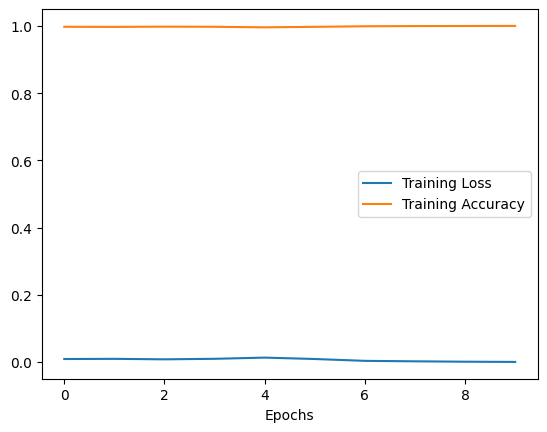

In [20]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 7 - Évaluation du Modèle </span>

In [21]:
from sklearn.metrics import accuracy_score, classification_report
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

313/313 [==============================] - 6s 20ms/step - loss: 0.9687 - accuracy: 0.8622
Loss: 0.9687460660934448, Accuracy: 0.8622000217437744


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 8 - Prédictions sur l'ensemble de test </span>

In [26]:
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).flatten()# Convertir les probabilités en classes
precision = accuracy_score(y_test, y_pred)
print(f'Accuracy: {precision}')

print('métriques de performance : ')
print(classification_report(y_test, y_pred))

313/313 [==============================] - 6s 18ms/step
Accuracy: 0.8622
métriques de performance : 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### - Accuracy (Précision globale) : 86.22%
        - L'accuracy représente le pourcentage total de prédictions correctes par rapport au nombre total d'échantillons. Dans ce cas, l'accuracy est de 86.22%, ce qui indique que le modèle a correctement classé environ 86.22% des échantillons.

#### Précision, Recall, et F1-score par Classe :

> ##### Classe 0 (Première classe: négative) :
            * Précision : 87%
                - Cela signifie que parmi toutes les prédictions positives pour la classe 0, 87% étaient correctes.
            * Rappel (Sensibilité) : 84%
                - Cela signifie que parmi tous les exemples réels de la classe 0, le modèle en a correctement identifié 84%.
            * F1-score : 86%
                - Il s'agit de la moyenne pondérée de la précision et du rappel et est utile lorsque les classes ne sont pas équilibrées. Un F1-score élevé indique un bon équilibre entre précision et rappel.
> ##### Classe 1 (Deuxième classe : positive) :
            * Précision : 85%
                - Cela signifie que parmi toutes les prédictions positives pour la classe 1, 85% étaient correctes.
            * Rappel : 88%
                - Cela signifie que parmi tous les exemples réels de la classe 1, le modèle en a correctement identifié 88%.
            * F1-score : 87%
            
#### Moyennes pondérées :
    * Moyenne pondérée de la précision : 86%
    * Moyenne pondérée du rappel : 86%
    * Moyenne pondérée du F1-score : 86%
#### Macro-average :
    * Macro-average de la précision, du rappel et du F1-score : 86%
        - La macro-average prend la moyenne non pondérée des métriques pour chaque classe. Dans ce cas, elle est de 86%, ce qui indique un bon équilibre global entre les performances des deux classes.


 #  <span style="color:red ; font-style:italic; text-decoration:underline;"> Partie II : Implémenter un réseau Bi-LSTM pour l'analyse de sentiment à l'aide d'un ensemble de données au format CSV. </span>

In [29]:

from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM, Bidirectional

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 1 - Construction du Modèle Bi-LSTM </span>

In [30]:
model_bi_lstm = Sequential()
embedding_dim = 32
vocab_size = len(tokenizer.word_index) + 1
model_bi_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model_bi_lstm.add(Bidirectional(LSTM(units=32)))# Ajouter une couche Bidirectional LSTM
model_bi_lstm.add(Dense(units=1, activation='sigmoid'))
model_bi_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           4048416   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4065121 (15.51 MB)
Trainable params: 4065121 (15.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 2- Compilation du Modèle Bi-LSTM </span>

In [32]:
model_bi_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 3- Entraînement du Modèle Bi-LSTM </span>

Epoch 1/10
250/250 [==============================] - 53s 203ms/step - loss: 0.4528 - accuracy: 0.7903 - val_loss: 0.2955 - val_accuracy: 0.8783
Epoch 2/10
250/250 [==============================] - 50s 199ms/step - loss: 0.2013 - accuracy: 0.9273 - val_loss: 0.2847 - val_accuracy: 0.8876
Epoch 3/10
250/250 [==============================] - 57s 230ms/step - loss: 0.1104 - accuracy: 0.9641 - val_loss: 0.3287 - val_accuracy: 0.8835
Epoch 4/10
250/250 [==============================] - 50s 201ms/step - loss: 0.0563 - accuracy: 0.9837 - val_loss: 0.4558 - val_accuracy: 0.8594
Epoch 5/10
250/250 [==============================] - 54s 218ms/step - loss: 0.0443 - accuracy: 0.9870 - val_loss: 0.4718 - val_accuracy: 0.8685
Epoch 6/10
250/250 [==============================] - 51s 203ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.5819 - val_accuracy: 0.8640
Epoch 7/10
250/250 [==============================] - 50s 201ms/step - loss: 0.0203 - accuracy: 0.9945 - val_loss: 0.5707 - val_ac

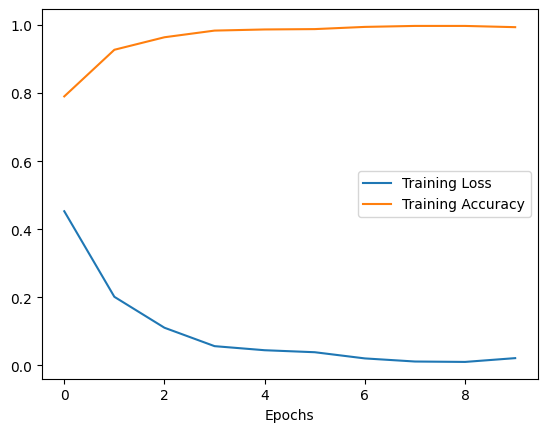

In [33]:
history_bi_lstm = model_bi_lstm.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history_bi_lstm.history['loss'], label='Training Loss')
plt.plot(history_bi_lstm.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 3 - Évaluation du Modèle Bi-LSTM sur l'ensemble de test </span>

In [34]:
loss_bi_lstm, accuracy_bi_lstm = model_bi_lstm.evaluate(X_test, y_test)
print(f'Loss: {loss_bi_lstm}, Accuracy: {accuracy_bi_lstm}')


313/313 [==============================] - 7s 21ms/step - loss: 0.6147 - accuracy: 0.8661
Loss: 0.6147105097770691, Accuracy: 0.866100013256073


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 4 - Prédictions sur l'ensemble de test </span>

In [35]:
y_pred_probs = model_bi_lstm.predict(X_test)
y_pred = np.round(y_pred_probs).flatten()# Convertir les probabilités en classes
precision = accuracy_score(y_test, y_pred)
print(f'Accuracy: {precision}')

print('métriques de performance : ')
print(classification_report(y_test, y_pred))

313/313 [==============================] - 7s 21ms/step
Accuracy: 0.8661
métriques de performance : 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4961
           1       0.85      0.90      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



> #### Accuracy (Précision globale) : 86.61%
    - L'accuracy représente le pourcentage total de prédictions correctes par rapport au nombre total d'échantillons. Dans ce cas, l'accuracy est de 86.61%, ce qui indique que le modèle Bi-LSTM a correctement classé environ 86.61% des échantillons.
> #### Précision, Recall, et F1-score par Classe :
>> ##### Classe 0 (Première classe : négative) :
    * Précision : 89%
        - Cela signifie que parmi toutes les prédictions positives pour la classe 0, 89% étaient correctes.
    * Rappel (Sensibilité) : 84%
        - Cela signifie que parmi tous les exemples réels de la classe 0, le modèle en a correctement identifié 84%.
    * F1-score : 86%
        - Il s'agit de la moyenne pondérée de la précision et du rappel, et elle est de 86% pour la classe 0.
>> ##### Classe 1 (Deuxième classe: positive) :
    * Précision : 85%
        - Cela signifie que parmi toutes les prédictions positives pour la classe 1, 85% étaient correctes.
    * Rappel : 90%
        - Cela signifie que parmi tous les exemples réels de la classe 1, le modèle en a correctement identifié 90%.
    * F1-score : 87%
        - Il s'agit de la moyenne pondérée de la précision et du rappel, et elle est de 87% pour la classe 1.
> #### Moyennes pondérées :
    - Moyenne pondérée de la précision : 87%
    - Moyenne pondérée du rappel : 87%
    - Moyenne pondérée du F1-score : 87%
> #### Macro-average :
    * Macro-average de la précision, du rappel et du F1-score : 87%
        - La macro-average prend la moyenne non pondérée des métriques pour chaque classe. Dans ce cas, elle est de 87%, ce qui indique un bon équilibre global entre les performances des deux classes.